In [1]:
!pip install mysql-connector-python     #package allows Python to connect to MySQL databases

In [2]:
pip install mysql

Note: you may need to restart the kernel to use updated packages.


In [3]:
import mysql.connector                 #Imports the mysql-connector-python library
import pandas as pd                    #importing pandas library

In [4]:
#Establishing a Connection to the MySQL Database

connection=mysql.connector.connect(
    user='root',
    password='dee123',
    host='localhost',
    database='erd'
)

In [5]:
cursor=connection.cursor()     #The cursor is used to execute SQL queries and fetch results from the database.

In [6]:
cursor.execute('SELECT* FROM UserActivity1')   #Executes an SQL query to select all records from the UserActivity1 table. The * symbol means "all columns."

In [7]:
user_data=pd.DataFrame(cursor.fetchall(),columns=[desc[0] for desc in cursor.description])

#FETCHALL = Retrieves all rows of data returned by the SQL query
#cursor.description : Provides metadata about the columns of the result set.
#[desc[0] for desc in cursor.description] : Creates a list of column names from the metadata.
#columns= : Sets these column names in the DataFrame.

In [8]:
print(user_data.head())

   User_ID  Age   Gender   Platform  Daily_Usage_Time  Posts_Per_Day  \
0        0    0  Unknown    Unknown                 0              0   
1       10   31     Male  Instagram               170              5   
2        0    0  Unknown    Unknown                 0              0   
3      877   32   Female  Instagram               155              6   
4        0    0  Unknown    Unknown                 0              0   

   Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                       0                          0                      0   
1                      80                         20                     35   
2                       0                          0                      0   
3                      75                         25                     38   
4                       0                          0                      0   

  Dominant_Emotion Unnamed_10  
0          Unknown             
1        Happiness          

In [9]:
print(user_data.tail())

     User_ID  Age   Gender   Platform  Daily_Usage_Time  Posts_Per_Day  \
291      109   29   Female   LinkedIn                55              2   
292        0    0  Unknown    Unknown                 0              0   
293       99   21   Female   Facebook                75              2   
294        0    0  Unknown    Unknown                 0              0   
295      493   24   Female  Instagram               200              6   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
291                      15                          5                     10   
292                       0                          0                      0   
293                      25                         13                     19   
294                       0                          0                      0   
295                     100                         18                     39   

    Dominant_Emotion Unnamed_10  
291          Neutral             


In [10]:
user_data.describe()

,User_ID,Age,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,243.057432,13.625000,47.347973,1.800676,19.388514,7.763514,11.459459
std,314.305573,13.921496,56.280386,2.354397,26.972448,10.568493,13.213439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000,10.500000,0.500000,0.500000,1.000000,1.000000,5.000000
75%,467.500000,27.000000,85.000000,3.000000,33.000000,14.000000,22.000000
max,986.000000,35.000000,200.000000,10.000000,110.000000,87.000000,54.000000


In [13]:
column_list = user_data.columns.tolist()
print(column_list)

['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Dominant_Emotion', 'Unnamed_10']


In [14]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   User_ID                    296 non-null    int64 
 1   Age                        296 non-null    int64 
 2   Gender                     296 non-null    object
 3   Platform                   296 non-null    object
 4   Daily_Usage_Time           296 non-null    int64 
 5   Posts_Per_Day              296 non-null    int64 
 6   Likes_Received_Per_Day     296 non-null    int64 
 7   Comments_Received_Per_Day  296 non-null    int64 
 8   Messages_Sent_Per_Day      296 non-null    int64 
 9   Dominant_Emotion           296 non-null    object
 10  Unnamed_10                 296 non-null    object
dtypes: int64(7), object(4)
memory usage: 25.6+ KB


In [17]:
user_data.isnull().sum()  #Checking null values

User_ID                      0
Age                          0
Gender                       0
Platform                     0
Daily_Usage_Time             0
Posts_Per_Day                0
Likes_Received_Per_Day       0
Comments_Received_Per_Day    0
Messages_Sent_Per_Day        0
Dominant_Emotion             0
Unnamed_10                   0
dtype: int64

In [18]:
user_data.duplicated().sum()  #checking duplicated values sum

154

In [19]:
user_data.drop_duplicates()   #droping duplicates

,User_ID,Age,Gender,Platform,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Unnamed_10
0,0,0,Unknown,Unknown,0,0,0,0,0,Unknown,
1,10,31,Male,Instagram,170,5,80,20,35,Happiness,
3,877,32,Female,Instagram,155,6,75,25,38,Happiness,
5,230,26,Non-binary,Facebook,45,1,8,4,12,Sadness,
7,876,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety,
...,...,...,...,...,...,...,...,...,...,...,...
287,277,27,Non-binary,LinkedIn,55,1,9,2,11,Anxiety,
289,830,26,Non-binary,Facebook,45,1,8,4,12,Sadness,
291,109,29,Female,LinkedIn,55,2,15,5,10,Neutral,
293,99,21,Female,Facebook,75,2,25,13,19,Anxiety,


In [20]:
val=user_data.drop_duplicates(inplace=True)
print(val)

None


In [21]:
user_data.duplicated().sum()

0

In [22]:
print(user_data)

     User_ID  Age      Gender   Platform  Daily_Usage_Time  Posts_Per_Day  \
0          0    0     Unknown    Unknown                 0              0   
1         10   31        Male  Instagram               170              5   
3        877   32      Female  Instagram               155              6   
5        230   26  Non-binary   Facebook                45              1   
7        876   28  Non-binary   Snapchat               115              3   
..       ...  ...         ...        ...               ...            ...   
287      277   27  Non-binary   LinkedIn                55              1   
289      830   26  Non-binary   Facebook                45              1   
291      109   29      Female   LinkedIn                55              2   
293       99   21      Female   Facebook                75              2   
295      493   24      Female  Instagram               200              6   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_D

In [24]:
#average time spend on social media

# Load the CSV file
data = pd.read_csv(r"C:\\ProgramData\\MySQL\\MySQL Server 8.0\\Uploads\\val sample.csv")

# Ensure 'Daily_Usage_Time (minutes)' column is numeric, coercing errors
data['Daily_Usage_Time (minutes)'] = pd.to_numeric(data['Daily_Usage_Time (minutes)'], errors='coerce')

# Drop rows with NaN values in 'Daily_Usage_Time (minutes)' column
data = data.dropna(subset=['Daily_Usage_Time (minutes)'])

# Calculate the mean daily usage time by platform
platform_usage_time = data.groupby('Platform')['Daily_Usage_Time (minutes)'].mean()

# Display the result
print(platform_usage_time)

Platform
Facebook      67.314286
Instagram    144.131579
LinkedIn      62.105263
Snapchat      95.789474
Telegram      75.000000
Twitter       87.480000
Whatsapp      94.000000
Name: Daily_Usage_Time (minutes), dtype: float64


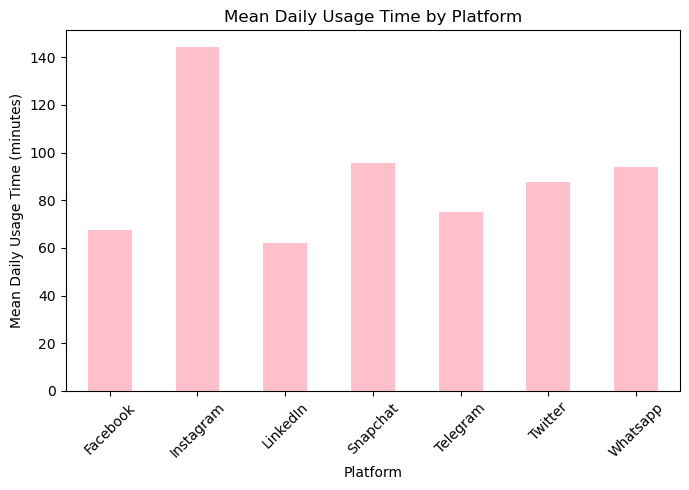

In [27]:
#Visualization
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(7,5))
platform_usage_time.plot(kind='bar', color='pink')
plt.xlabel('Platform')
plt.ylabel('Mean Daily Usage Time (minutes)')
plt.title('Mean Daily Usage Time by Platform')
plt.xticks(rotation=45)  #used to get/set the current tick location and labels
plt.tight_layout()
plt.show()

In [ ]:
The bar plot shows that Instagram has the highest mean daily usage time at about 144 minutes, followed by Snapchat (96 minutes).
Whatsapp, Twitter, and Telegram also see notable usage (around 94, 87, and 75 minutes, respectively).
Facebook and LinkedIn have the lowest usage times, at about 67 and 62 minutes each.

In [25]:
#what are the typical emotion responses to social media interaction?

# Count the occurrences of each dominant emotion
emotion_counts = data['Dominant_Emotion'].value_counts()

# Display the emotion counts
print("Distribution of Dominant Emotions:")
print(emotion_counts)

Distribution of Dominant Emotions:
Dominant_Emotion
Anxiety      32
Neutral      30
Happiness    28
Sadness      25
Boredom      18
Anger        14
Agression     1
Name: count, dtype: int64


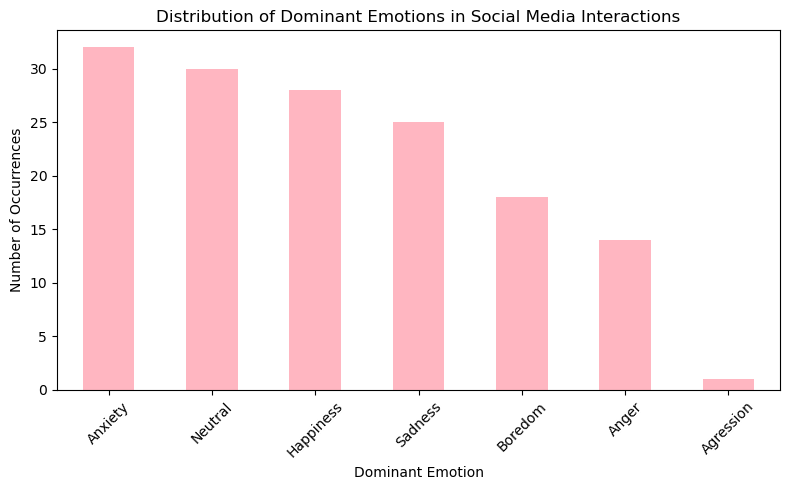

In [28]:
# Plotting
plt.figure(figsize=(8, 5))
emotion_counts.plot(kind='bar', color='lightpink')
plt.xlabel('Dominant Emotion')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Dominant Emotions in Social Media Interactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
The bar plot shows the distribution of dominant emotions in social media interactions. 
Anxiety is the most common emotion, with 32 occurrences, followed by Neutral (30), and Happiness (28). 
Sadness is also relatively frequent with 25 occurrences. Boredom (18), Anger (14), and Aggression (1) are less common.

In [29]:
#How does social media usage vary across different platform?


# List of columns to be converted to numeric
numeric_columns = ['Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']

# Convert the relevant columns to numeric, coercing errors to NaN
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in any of the numeric columns
data = data.dropna(subset=numeric_columns)

# Group by Platform and calculate the mean of usage metrics
platform_usage = data.groupby('Platform')[numeric_columns].mean()

# Display the average social media usage across platforms
print("Average Social Media Usage Across Platforms:")
print(platform_usage)

Average Social Media Usage Across Platforms:
           Daily_Usage_Time (minutes)  Posts_Per_Day  Likes_Received_Per_Day  \
Platform                                                                       
Facebook                    67.314286       2.514286               21.228571   
Instagram                  144.131579       5.921053               70.736842   
LinkedIn                    62.105263       1.842105               14.736842   
Snapchat                    95.789474       3.105263               33.894737   
Telegram                    75.000000       2.571429               29.285714   
Twitter                     87.480000       3.600000               36.760000   
Whatsapp                    94.000000       3.600000               52.000000   

           Comments_Received_Per_Day  Messages_Sent_Per_Day  
Platform                                                     
Facebook                   10.000000              18.800000  
Instagram                  24.973684            

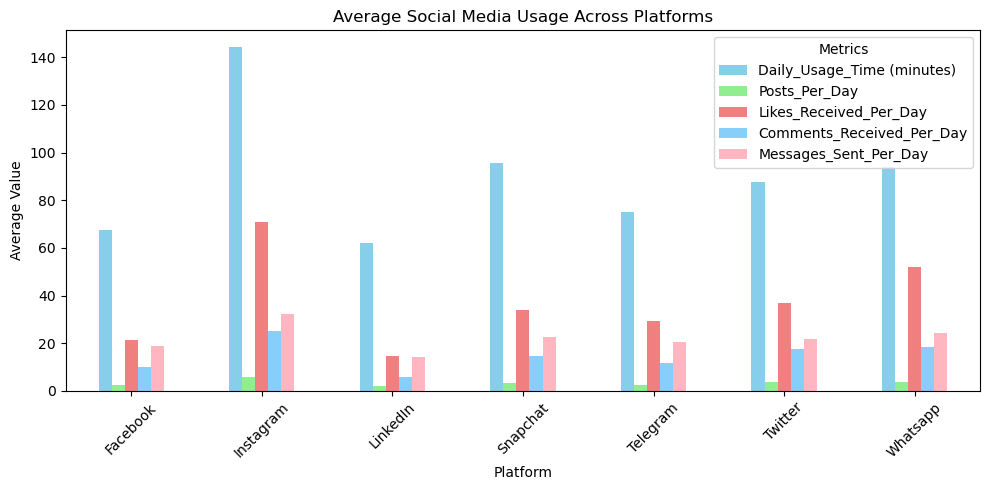

In [30]:
# Plotting
plt.figure(figsize=(10,5))

# Plotting all metrics in one figure
platform_usage.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.title('Average Social Media Usage Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics', loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
The bar plot shows that Instagram users are the most active, with the highest averages in daily usage time (144 minutes), 
posts per day (5.9), likes received per day (71), comments received per day (25), and messages sent per day (32).
LinkedIn users are the least active across these metrics.

In [31]:
#is there a correlation between different social media usage patterns and emotional well-being?


# Select only the numeric columns
numeric_data = data.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                             User_ID       Age  Daily_Usage_Time (minutes)  \
User_ID                     1.000000  0.061255                    0.040505   
Age                         0.061255  1.000000                    0.112598   
Daily_Usage_Time (minutes)  0.040505  0.112598                    1.000000   
Posts_Per_Day               0.053350  0.060175                    0.680723   
Likes_Received_Per_Day      0.070061  0.105362                    0.883908   
Comments_Received_Per_Day   0.068372  0.120851                    0.569783   
Messages_Sent_Per_Day       0.062957  0.090366                    0.676196   

                            Posts_Per_Day  Likes_Received_Per_Day  \
User_ID                          0.053350                0.070061   
Age                              0.060175                0.105362   
Daily_Usage_Time (minutes)       0.680723                0.883908   
Posts_Per_Day                    1.000000                0.733066   
Likes_Rece

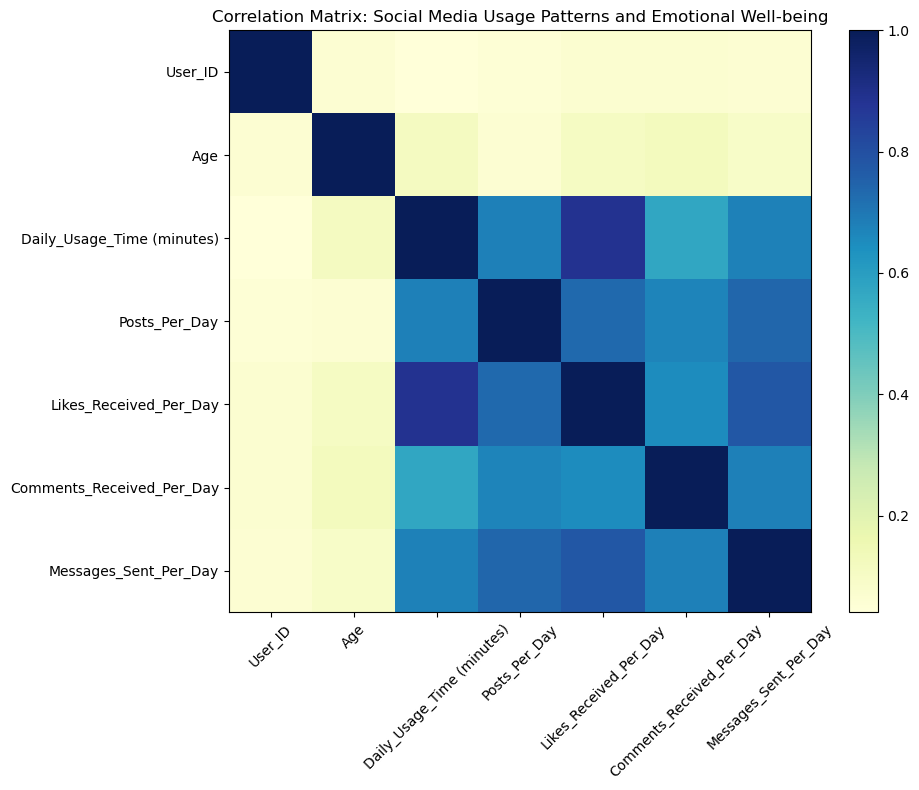

In [32]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='YlGnBu', interpolation='nearest')
plt.title('Correlation Matrix: Social Media Usage Patterns and Emotional Well-being')
plt.colorbar()

# Adding labels to axes
tick_labels = list(numeric_data.columns)
plt.xticks(range(len(tick_labels)), tick_labels, rotation=45)
plt.yticks(range(len(tick_labels)), tick_labels)

plt.tight_layout()
plt.show()

In [33]:
#how can we quantify the emotional well-being risk associated with different social media usage patterns?

# Define which emotions are considered negative
negative_emotions = ['Sadness', 'Anger', 'Fear']

# Create a new column to quantify emotional risk
data['Emotional_Risk'] = data['Dominant_Emotion'].apply(lambda x: 1 if x in negative_emotions else 0)

# Analyze the risk associated with different usage patterns
risk_by_platform = data.groupby('Platform')['Emotional_Risk'].mean()

# Display the emotional risk by platform
print("Emotional Risk by Platform:")
print(risk_by_platform)

Emotional Risk by Platform:
Platform
Facebook     0.228571
Instagram    0.131579
LinkedIn     0.157895
Snapchat     0.263158
Telegram     0.428571
Twitter      0.520000
Whatsapp     0.400000
Name: Emotional_Risk, dtype: float64


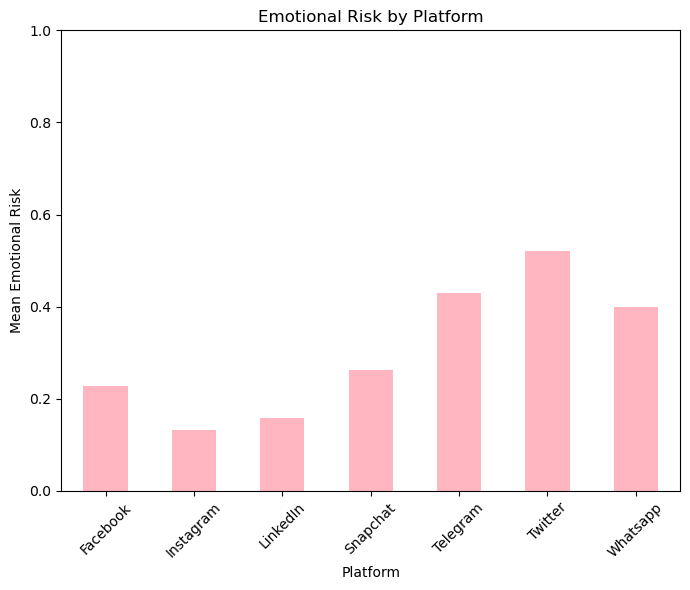

In [36]:
plt.figure(figsize=(7, 6))
risk_by_platform.plot(kind='bar', color='lightpink')
plt.title('Emotional Risk by Platform')
plt.xlabel('Platform')
plt.ylabel('Mean Emotional Risk')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Setting y-axis limit from 0 to 1
plt.tight_layout()
plt.show()

In [ ]:
The bar plot shows that Twitter has the highest emotional risk (0.52), followed by Telegram (0.43) andWhatsapp (0.40).
Snapchat (0.26), Facebook (0.23), and LinkedIn (0.16) have lower risks,with Instagram having the lowest emotional risk (0.13)